# Lab on sourcing Data


#### This is going to be an independent lab.
#### Every person is reponsible for their own submission and their own codebase. 
#### Collaboration is fine, but visualizations should be unique, and specific functions and methods should be your own work.

In [26]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
import json
import sqlalchemy
from sqlalchemy import create_engine, select, MetaData, Table, and_
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.inspection import inspect

In [1]:
# You are going to select an API ENDPOINT.
# Your goal is to make a call to the API.
# You are going to then take the data returned and store it in a Database.
# You are going to take the raw data and make a new table from it that contains the data in a more workable format
# You are going to build out at least 3 helper functions that help you access data from your DB, or transforms your data into a specific format.
# Using your helper functions, create 2 visualizations that from the data you sourced.
# 2 Visualizations minimum.

### Insert your code below for accessing the API endpoint and getting the data.

In [9]:
payload = {'$limit': 30}
r = requests.get('https://data.cityofnewyork.us/resource/jb7j-dtam.json', params=payload)
r.json()

[{'year': '2019',
  'leading_cause': 'Influenza (Flu) and Pneumonia (J09-J18)',
  'sex': 'Male',
  'race_ethnicity': 'Asian and Pacific Islander',
  'deaths': '92',
  'death_rate': '15.70070363',
  'age_adjusted_death_rate': '15.27352088'},
 {'year': '2019',
  'leading_cause': 'Cerebrovascular Disease (Stroke: I60-I69)',
  'sex': 'Male',
  'race_ethnicity': 'Non-Hispanic White',
  'deaths': '266',
  'death_rate': '20.29465396',
  'age_adjusted_death_rate': '14.85203326'},
 {'year': '2019',
  'leading_cause': 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
  'sex': 'Male',
  'race_ethnicity': 'Hispanic',
  'deaths': '174',
  'death_rate': '14.84948257',
  'age_adjusted_death_rate': '16.10828575'},
 {'year': '2019',
  'leading_cause': 'Cerebrovascular Disease (Stroke: I60-I69)',
  'sex': 'Male',
  'race_ethnicity': 'Asian and Pacific Islander',
  'deaths': '105',
  'death_rate': '17.91928132',
  'age_adjusted_death_rate': '16.87065413'},
 {'year': '2019',
  'leading_c

In [10]:
# We know our json is in a dictionary format with our headers as keys
# Let's return our headers in the form of a list
columns = list(r.json()[0].keys())
columns

['year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

### Insert your code below that stores the raw data that you pulled into a database.


In [8]:
# Create & connect to the database
con = sqlite3.connect('nycdeaths.db')

# Create cursor to handle SQL queries
cur = con.cursor()

In [12]:
# Let's create our table using the header names

create_table = '''CREATE TABLE NYC_Deaths(
                  id INTEGER PRIMARY KEY AUTOINCREMENT,
                  year INTEGER,
                  leading_cause TEXT,
                  sex TEXT,
                  race_ethnicity TEXT,
                  deaths INTEGER,
                  death_rate REAL,
                  age_adjusted_death_rate REAL)'''

In [13]:
cur.execute(create_table)

In [16]:
#Load data into database
def load_data(data_dict):
    # Get all values from current dict
    values = list(data_dict.values())
    cur.execute('''INSERT INTO NYC_Deaths(
                year,
                leading_cause,
                sex,
                race_ethnicity,
                deaths,
                death_rate,
                age_adjusted_death_rate) VALUES
                (?, ?, ?, ?, ?, ?, ?)''', (values[0], values[1], values[2], values[3], values[4], values[5], values[6]))
    print(f'Successfully inserted: {values}')

In [19]:
# Iterate through each record in the raw json data
for row in data:
    load_data(row)

Successfully inserted: ['2019', 'Influenza (Flu) and Pneumonia (J09-J18)', 'Male', 'Asian and Pacific Islander', '92', '15.70070363', '15.27352088']
Successfully inserted: ['2019', 'Cerebrovascular Disease (Stroke: I60-I69)', 'Male', 'Non-Hispanic White', '266', '20.29465396', '14.85203326']
Successfully inserted: ['2019', 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)', 'Male', 'Hispanic', '174', '14.84948257', '16.10828575']
Successfully inserted: ['2019', 'Cerebrovascular Disease (Stroke: I60-I69)', 'Male', 'Asian and Pacific Islander', '105', '17.91928132', '16.87065413']
Successfully inserted: ['2019', 'All Other Causes', 'Male', 'Asian and Pacific Islander', '549', '93.69224232', '90.70089869']
Successfully inserted: ['2019', 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)', 'Male', 'Non-Hispanic White', '272', '20.75242811', '16.68493048']
Successfully inserted: ['2019', 'Mental and Behavioral Disorders due to Accidental Poisoning and Other P

In [ ]:
cur.execute('''SELECT * FROM NYC_Deaths''')
fetch_data = cur.fetchall()

# Close connection
con.close()

### Insert your code below that takes the raw data and transforms it into a more useable format.

In [12]:
# Let's take our raw json data and format it into a table using Pandas
# Note - this is a sampling of 30 individuals who died; not accurate representation of entire population
df = pd.read_json(r.text)
df

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2019,Influenza (Flu) and Pneumonia (J09-J18),Male,Asian and Pacific Islander,92,15.700704,15.273521
1,2019,Cerebrovascular Disease (Stroke: I60-I69),Male,Non-Hispanic White,266,20.294654,14.852033
2,2019,"Accidents Except Drug Poisoning (V01-X39, X43,...",Male,Hispanic,174,14.849483,16.108286
3,2019,Cerebrovascular Disease (Stroke: I60-I69),Male,Asian and Pacific Islander,105,17.919281,16.870654
4,2019,All Other Causes,Male,Asian and Pacific Islander,549,93.692242,90.700899
5,2019,"Accidents Except Drug Poisoning (V01-X39, X43,...",Male,Non-Hispanic White,272,20.752428,16.684930
6,2019,Mental and Behavioral Disorders due to Acciden...,Male,Hispanic,423,36.099604,35.707896
7,2019,Cerebrovascular Disease (Stroke: I60-I69),Male,Hispanic,182,15.532217,19.558378
8,2019,Essential Hypertension and Renal Diseases (I10...,Male,Hispanic,135,11.521150,15.712798
9,2019,Malignant Neoplasms (Cancer: C00-C97),Male,Asian and Pacific Islander,671,114.512741,105.924264


### Insert your code below that contains your three helper functions for accessing and working with your database.

In [74]:
con = sqlite3.connect('nycdeaths.db')
cur = con.cursor()

sql_create_raw_json_table = '''CREATE TABLE raw_json(
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                raw_text text
                            )'''
                            
list_of_tuples = [(json.dumps(x),) for x in r.json()]

cur.executemany('INSERT INTO raw_json (raw_text) VALUES (?)', list_of_tuples)

con.close()

def get_raw_data():
    con = sqlite3.connect('nycdeaths.db')
    cur = con.cursor()
    list_of_rows = []
    for row in cur.execute('SELECT * from raw_json'):
        list_of_rows.append(row)
    con.close()
    return list_of_rows

raw_data = get_raw_data()

raw_data

OperationalError: no such table: raw_json

In [75]:
def return_rows_by_leading_cause(cod):
    con = sqlite3.connect('nycdeaths.db')
    cur = con.cursor()
    dict_to_pass = {'x':cod}
    list_of_rows = [x for x in cur.execute('select * from NYC_Deaths where leading_cause=:x',dict_to_pass)]
    con.close()
    if list_of_rows:
        return list_of_rows
    else:
        return 'No Matches Found'

In [76]:
def json_extractor(list_of_dicts):
    # Initialize a list that's going to hold all of my tuple pairs
    list_of_tuples = []
    # Iterate over the list of dictionaries
    for row in list_of_dicts:
        # Create a tuple of all values within that row
        temp_list = tuple(x for x in row.values())
        # Append the tuple to the list
        list_of_tuples.append(temp_list)
    return list_of_tuples

### Insert your code below that takes the data you sourced, and creates 2 visualizations from that data.

In [80]:

df['race_ethnicity'].value_counts()

aspi = df[df.race_ethnicity == 'Asian and Pacific Islander']
his = df[df.race_ethnicity == 'Hispanic']
yt = df[df.race_ethnicity == 'Non-Hispanic White']

his['deaths'].sum()
aspi['deaths'].sum()
yt['deaths'].sum()

deaths = [aspi['deaths'].sum(), yt['deaths'].sum(), his['deaths'].sum()]
race_eth = ['Asian & Pacific Islander', 'Non-Hisp White', 'Hispanic']

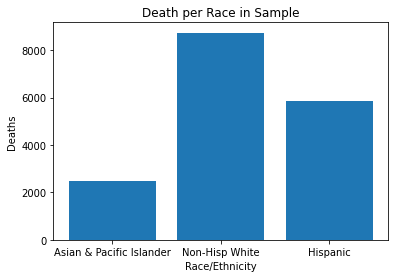

In [83]:
plt.bar(x=race_eth, height=deaths)
plt.title('Death per Race in Sample'), plt.xlabel("Race/Ethnicity"), plt.ylabel("Deaths");

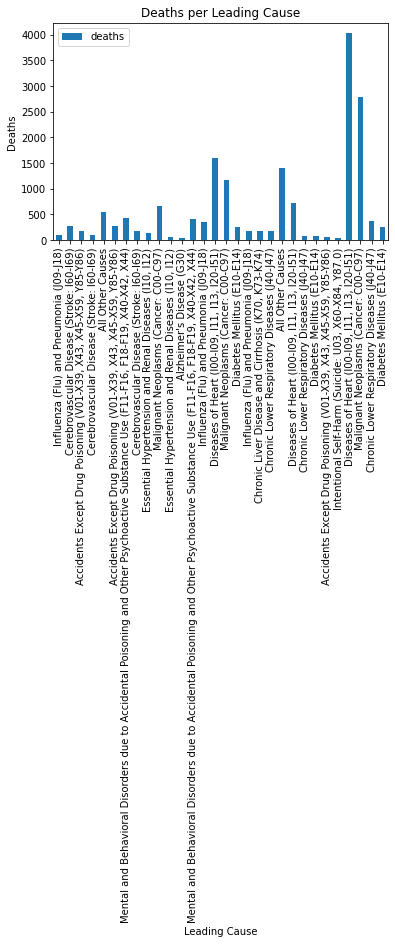

In [54]:
# Side note - semicolon(;) gets rid of the following unwanted line output
# <AxesSubplot:title={'center':'Deaths per Leading Cause'}, xlabel='Leading Cause', ylabel='Deaths'>
df.plot(x='leading_cause', xlabel='Leading Cause', y='deaths', ylabel='Deaths', kind='bar', title='Deaths per Leading Cause');